   # Music Genre Classification with Deep learning methods
  

In [ ]:
# feature extractoring and preprocessing data
import librosa
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import librosa.display
import pathlib
import gc
import tensorflow as tf

# Preprocessing
from keras import models
from keras import layers
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler , normalize
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from tensorflow.keras.regularizers import l2, l1
from collections import OrderedDict

#Keras
import keras
import warnings
warnings.filterwarnings('ignore')

##Preprocessing
This part of code couldn't download the dataset properly at first run. Please upload the kaggle.json file and run the second time!

In this part, the code will download the gtzan dataset from Kaggle and transfer it to spectrogram images to extract features: Root Mean Square Error (RMSE),Mel-frequency cepstral coefficients (MFCC), Spectral Centroid, Spectral Bandwidth, Zero Crossing Rate,Chrome Frequencies, Spectral Roll-off and stored in the Pandas dataframe.

In [ ]:
# Downlaoding dataset need you upload "kaggle.json" first.
!pip install kaggle
!mkdir /kaggle
path = "/content/"
os.chdir(path)
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification



mkdir: cannot create directory ‘/kaggle’: File exists
100% 1.21G/1.21G [00:57<00:00, 23.9MB/s]
100% 1.21G/1.21G [00:57<00:00, 22.5MB/s]


In [ ]:
!unzip gtzan-dataset-music-genre-classification
!rm -r '/content/gtzan-dataset-music-genre-classification.zip'

Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blues.00014.wa

In [ ]:
# Delete the corrupted file: jazz.00054.wav
!rm /content/Data/genres_original/jazz/jazz.00054.wav
# Extracting the Spectogram for every Audio

# Set color scheme for the spectogram
cmap = plt.get_cmap('inferno')
# New matplotlib figure with a size of 10x10 inches.
plt.figure(figsize=(5,5))

genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'/content/output/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'/content/Data/genres_original/{g}'):
        song_path = f'/content/Data/genres_original/{g}/{filename}'

        print (filename)
        print ({g})
        print (song_path)

        # Truncate songs to a maximum of 5 seconds and set it to monophonic signal
        # with default sample rate 22,050 Hz because high frequencies above 11 kHz are not critical for the analysis (Nyquist theorem)
        y, sr = librosa.load(song_path, mono=True, duration=5)
        # This line creates a spectrogram from the audio data. NFFT is the number of data points used in each block for the FFT,
        # Fs is the sampling frequency, Fc is the center frequency, noverlap is the number of points of overlap between blocks, and cmap is the color map defined earlier.
        plt.specgram(y, NFFT=2048, Fs= sr, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'/content/output/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

blues.00077.wav
{'blues'}
/content/Data/genres_original/blues/blues.00077.wav
blues.00067.wav
{'blues'}
/content/Data/genres_original/blues/blues.00067.wav
blues.00006.wav
{'blues'}
/content/Data/genres_original/blues/blues.00006.wav
blues.00079.wav
{'blues'}
/content/Data/genres_original/blues/blues.00079.wav
blues.00001.wav
{'blues'}
/content/Data/genres_original/blues/blues.00001.wav
blues.00092.wav
{'blues'}
/content/Data/genres_original/blues/blues.00092.wav
blues.00021.wav
{'blues'}
/content/Data/genres_original/blues/blues.00021.wav
blues.00031.wav
{'blues'}
/content/Data/genres_original/blues/blues.00031.wav
blues.00047.wav
{'blues'}
/content/Data/genres_original/blues/blues.00047.wav
blues.00089.wav
{'blues'}
/content/Data/genres_original/blues/blues.00089.wav
blues.00015.wav
{'blues'}
/content/Data/genres_original/blues/blues.00015.wav
blues.00081.wav
{'blues'}
/content/Data/genres_original/blues/blues.00081.wav
blues.00046.wav
{'blues'}
/content/Data/genres_original/blues/bl

<Figure size 500x500 with 0 Axes>

### This part just to demo the different music genres wull result in different spectrogram., need to run if you want to save time.

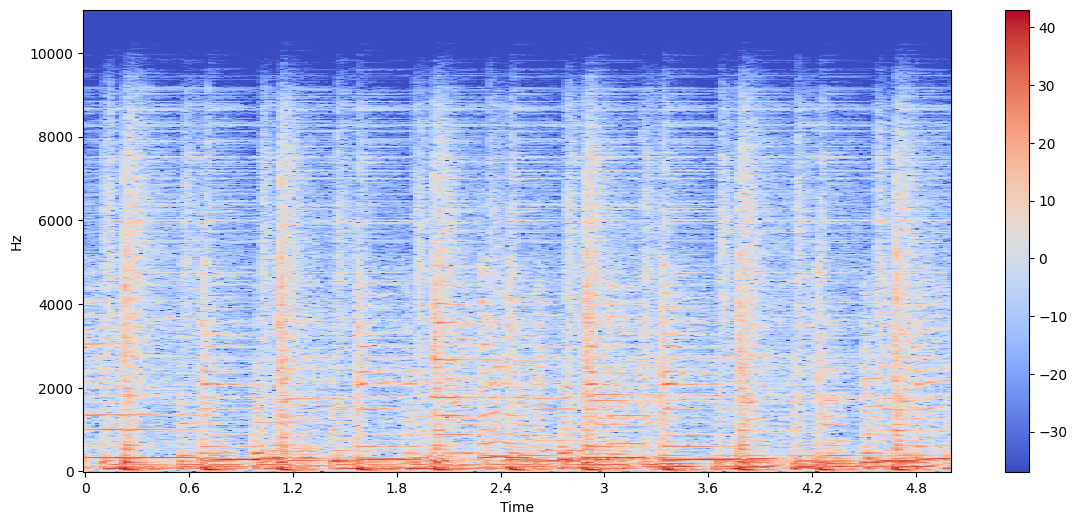

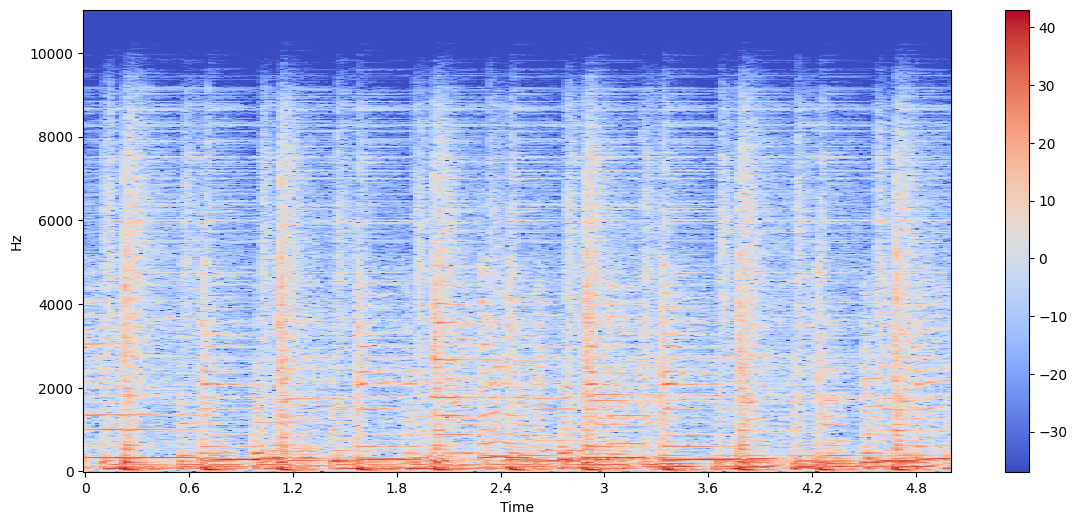

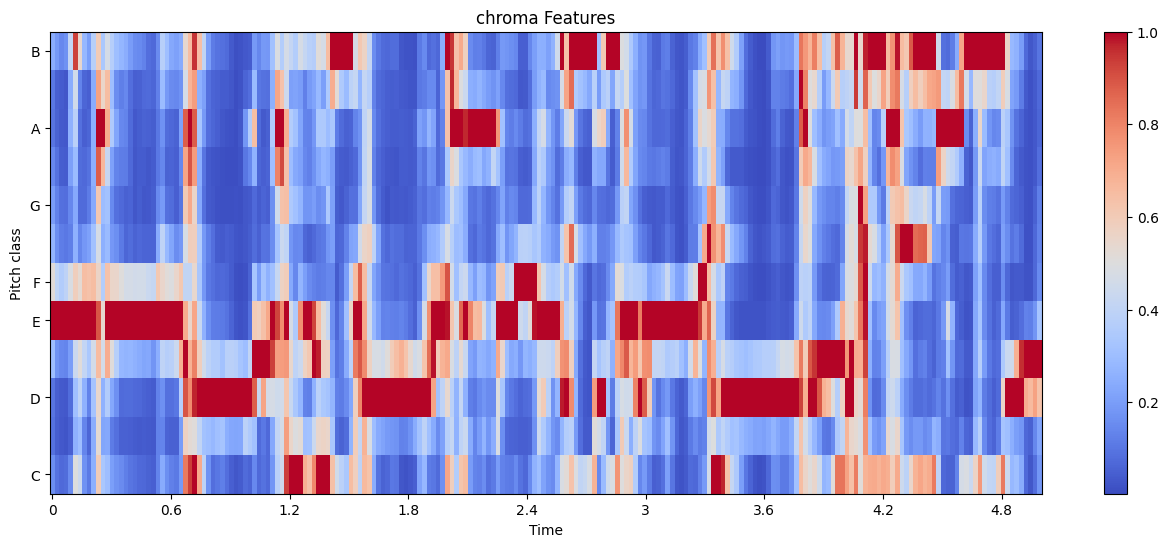

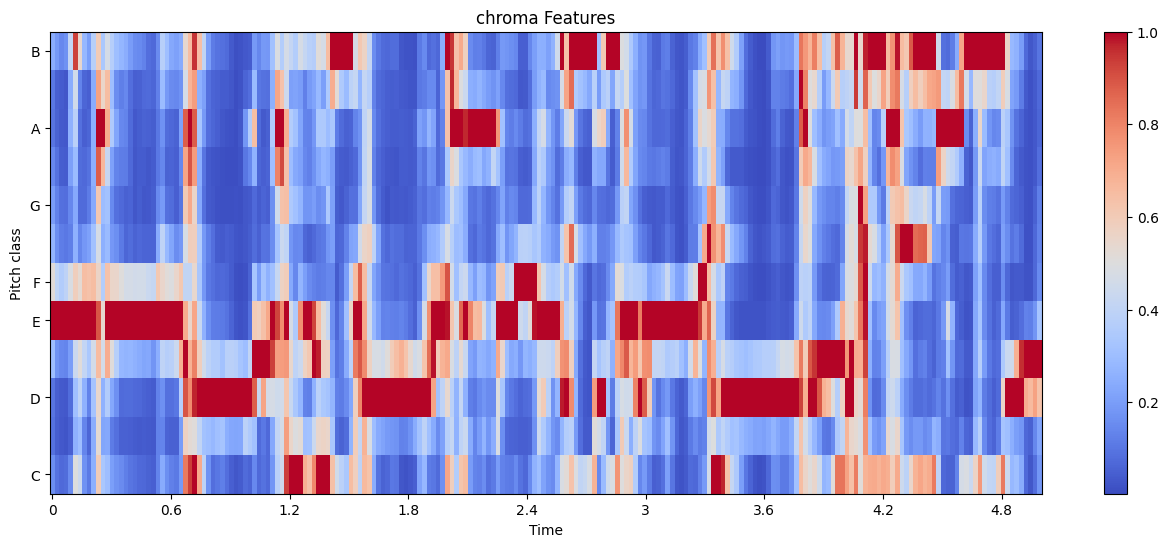

In [ ]:
import librosa.display as lplt

# creates a list of genres from a string by splitting it at spaces, resulting in ['blues', 'classical'].
audio_1="/content/Data/genres_original/blues/blues.00050.wav"

audio_2="/content/Data/genres_original/rock/rock.00048.wav"

data_1 , sr_1=librosa.load(audio_1, mono=True, duration=5)

data_2 , sr_2=librosa.load(audio_1, mono=True, duration=5)

stft =librosa.stft(data_1)
stft_db =librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sr_1,x_axis='time',y_axis='hz')
plt.colorbar()

stft =librosa.stft(data_2)
stft_db =librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sr_2,x_axis='time',y_axis='hz')
plt.colorbar()


chroma=librosa.feature.chroma_stft(y = data_1,sr=sr_1)
plt.figure(figsize=(16,6))
lplt.specshow(chroma,sr=sr,x_axis='time',y_axis='chroma',cmap='coolwarm')
plt.colorbar()
plt.title("chroma Features")
plt.show()


chroma=librosa.feature.chroma_stft(y = data_2,sr=sr_2)
plt.figure(figsize=(16,6))
lplt.specshow(chroma,sr=sr_2,x_axis='time',y_axis='chroma',cmap='coolwarm')
plt.colorbar()
plt.title("chroma Features")
plt.show()

### Feature Extraction Step:

In [ ]:
#Extracting features from Spectogram

# Create an empty list to store the feature dictionaries
data = []

for g in genres:
    for filename in os.listdir(f'/content/Data/genres_original/{g}'):
        song_path = f'/content/Data/genres_original/{g}/{filename}'
        y, sr = librosa.load(song_path, mono=True, duration=3)
        # Extract features
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        rmse = librosa.feature.rms(y=y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        # Create a dictionary for the current file's features
        feature_dict = {
            'filename': filename,
            'chroma_stft': np.mean(chroma_stft),
            'rmse': np.mean(rmse),
            'spectral_centroid': np.mean(spec_cent),
            'spectral_bandwidth': np.mean(spec_bw),
            'rolloff': np.mean(rolloff),
            'zero_crossing_rate': np.mean(zcr),
        }
        # Append the feature dictionary to the data list
        for i, mfcc_coeff in enumerate(np.mean(mfcc, axis=1)):
            feature_dict[f'mfcc{i+1}'] = mfcc_coeff
        feature_dict['label'] = g
        # Append the dictionary to the data list
        data.append(feature_dict)

# Create a DataFrame from the list of feature dictionaries
features_df = pd.DataFrame(data)


In [ ]:
features_df.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00077.wav,0.418600,0.256227,2083.159214,2111.938898,4283.699482,0.105510,-19.074963,113.048737,-35.951397,...,12.036222,-11.062042,9.174410,-9.980545,7.749778,-9.714650,0.235498,-8.202963,0.087370,blues
1,blues.00067.wav,0.361291,0.124903,2335.326454,2250.512721,4943.609337,0.111080,-90.479942,99.135788,-21.992033,...,9.447903,-19.850065,4.741850,-9.223646,9.141879,-17.062695,6.973995,-5.579132,-3.571680,blues
2,blues.00006.wav,0.264813,0.183206,1781.347147,1577.633356,3482.415865,0.084762,-154.916260,111.514305,-47.343029,...,1.449379,-7.853642,-13.158746,-7.266078,-7.720587,-11.297014,-8.372663,-6.932214,-9.567272,blues
3,blues.00079.wav,0.434280,0.250266,2602.045661,2471.814720,5633.003117,0.129947,-11.020612,84.693886,-22.465576,...,15.324958,-12.431035,12.594558,-13.604244,4.447948,-19.694494,0.458277,-8.883692,-8.399784,blues
4,blues.00001.wav,0.401777,0.092470,1280.783901,1921.746662,2894.393780,0.039566,-266.531097,116.676712,17.117649,...,9.926490,0.816662,5.252372,-3.005573,1.622480,1.295678,0.116458,-0.842911,0.386533,blues


In [ ]:
LSTM_df = features_df
features_df.shape

(999, 28)

### Normalize feature values

In [ ]:
# Drop the 'filename' column
features_df = features_df.drop(['filename'], axis=1)

# Encode genre labels
# Labels are assumed to be in the last column
genre_list = features_df.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

# Standardize features by removing the mean and scaling to unit variance (from scikit-learn):
scaler = StandardScaler()
# Convert features to float
X = scaler.fit_transform(features_df.iloc[:, :-1].values.astype(float))

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)


In [ ]:
print(len(y_train))
print(len(y_test))
print(X_train.shape)
print(X_train[10])

799
200
(799, 26)
[-0.05367275 -1.29925705 -0.68228287 -0.30430377 -0.46885029 -0.83344179
 -0.93775442  0.65848052  0.10941227  0.32882727 -0.63362027  0.43604394
 -1.25931737  0.63461104 -1.16118802  0.10778808 -1.4449653   1.11301507
 -0.23269303  1.16512433 -0.15479868  0.87493308 -0.18289346  0.44376125
 -0.25071601 -0.19686736]


In [ ]:
df = pd.read_csv('/content/Data/features_3_sec.csv')
# df.dtypes

In [ ]:
# Drop the 'filename' column
df = df.drop(['filename'], axis=1)

# Encode genre labels
# Labels are assumed to be in the last column
genre_list = df.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

# Standardize features by removing the mean and scaling to unit variance (from scikit-learn):
scaler = StandardScaler()
# Convert features to float
X = scaler.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Method 1 Fully connected network on extracted features

In [ ]:
# Model 1 architecture
model_1 = models.Sequential()
model_1.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model_1.add(layers.Dense(128, activation='relu'))
model_1.add(layers.Dense(64, activation='relu'))
# Adjust the number of output neurons to match the number of unique genre labels
model_1.add(layers.Dense(len(np.unique(y)), activation='softmax'))
# Compile the model
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               15104     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 56906 (222.29 KB)
Trainable params: 56906 (222.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model_1.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,  # This will use 20% of the training data as validation data
    verbose=1
)

Epoch 1/50
50/50 [==============================] - 8s 14ms/step - loss: 1.5092 - accuracy: 0.4852 - val_loss: 1.0734 - val_accuracy: 0.6204
Epoch 2/50
50/50 [==============================] - 0s 5ms/step - loss: 0.9120 - accuracy: 0.6892 - val_loss: 0.8307 - val_accuracy: 0.7123
Epoch 3/50
50/50 [==============================] - 0s 5ms/step - loss: 0.7039 - accuracy: 0.7624 - val_loss: 0.7131 - val_accuracy: 0.7686
Epoch 4/50
50/50 [==============================] - 0s 5ms/step - loss: 0.5932 - accuracy: 0.8006 - val_loss: 0.6386 - val_accuracy: 0.7930
Epoch 5/50
50/50 [==============================] - 0s 5ms/step - loss: 0.5011 - accuracy: 0.8351 - val_loss: 0.6056 - val_accuracy: 0.8011
Epoch 6/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4309 - accuracy: 0.8622 - val_loss: 0.5671 - val_accuracy: 0.8174
Epoch 7/50
50/50 [==============================] - 0s 5ms/step - loss: 0.3613 - accuracy: 0.8888 - val_loss: 0.5182 - val_accuracy: 0.8280
Epoch 8/50
50/50 [=

In [ ]:
y_pred = model_1.predict(X_test)
# Use when output layer uses softmax
y_pred_classes = np.argmax(y_pred, axis=1)

63/63 [==============================] - 0s 2ms/step


Accuracy: 0.8948948948948949
Precision: 0.894213413394802
Recall: 0.8938913029598451
F1 Score: 0.893706161582554
Normalized confusion matrix


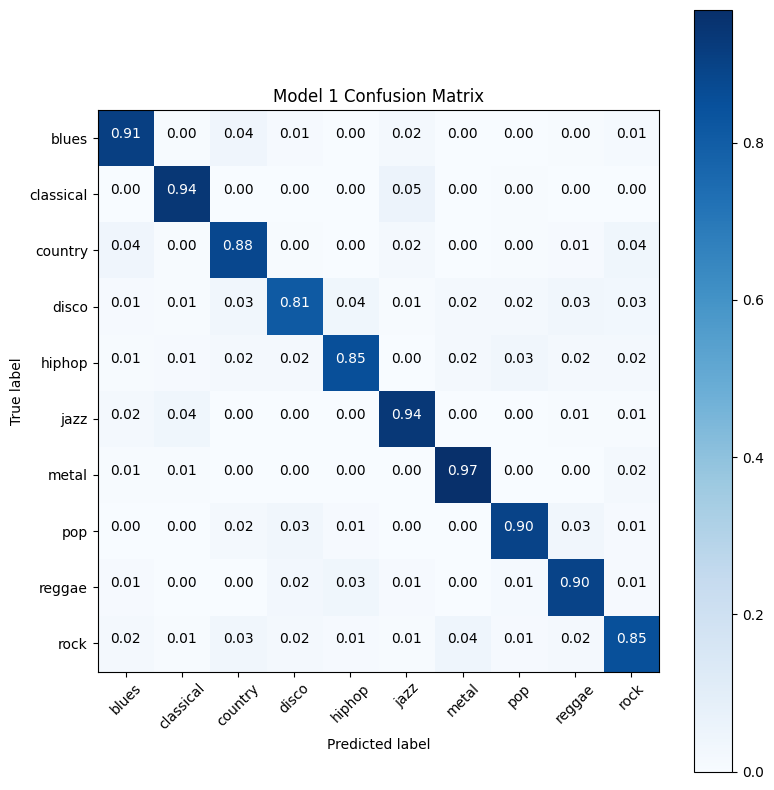

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='macro')  # 'macro' if you want to treat all classes equally
recall = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average='macro')

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()
# Plotting the heatmap

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, keys, normalize=True)
plt.title('Model 1 Confusion Matrix')
plt.show()

# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

Final validation accuracy 0.8843026757240295
Maximal validation accuracy achieved = 0.8849281072616577 at epoch 47


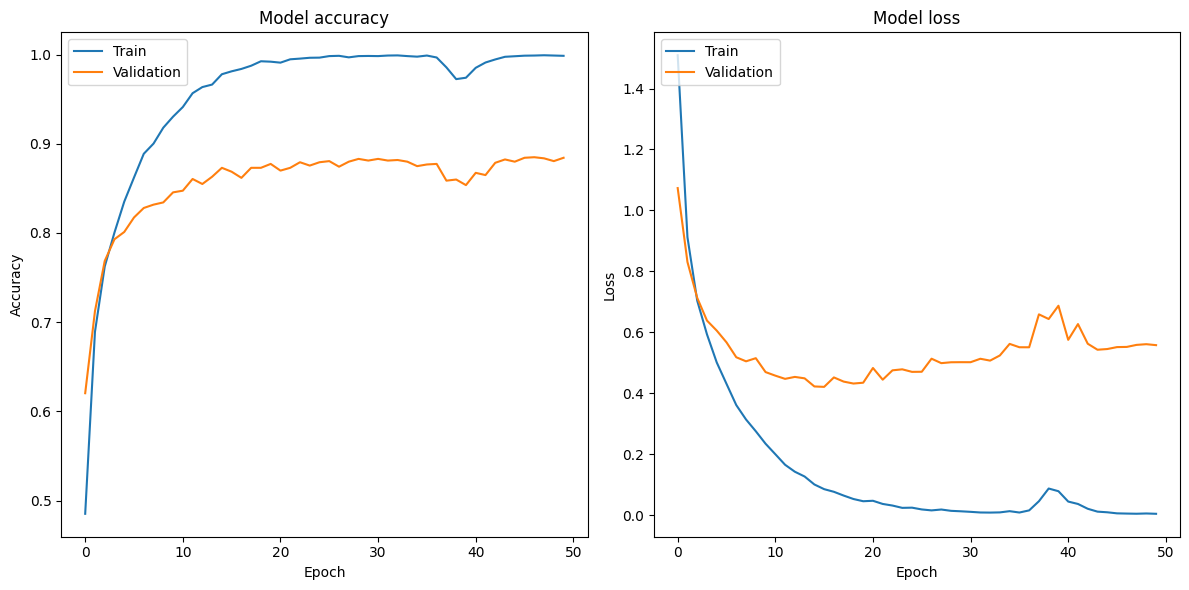

In [ ]:
print(f"Final validation accuracy", history.history['val_accuracy'][-1])
print(f"Maximal validation accuracy achieved =", np.max(history.history['val_accuracy']),
      "at epoch",(np.argmax(history.history['val_accuracy'])+1))
# Plot training & validation accuracy values

# Set up the figure size to be square for both subplots
plt.figure(figsize=(12, 6))  # Overall figure size

# Set up the first subplot for accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Set up the second subplot for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
# Adjust subplot parameters to give specified padding
plt.tight_layout()
# Show the complete figure with both subplots
plt.show()

In [ ]:
# Clean old model files
del model_1
K.clear_session()
gc.collect()

21180

##Method 2 (Fully connected network + Dropout on extracted features )
The overfitting issue is reduced, but accurrracy didn't improve

In [ ]:
#Model 2 Architecture
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))  # Add dropout of 20%
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.2))  # Add dropout of 20%
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Add dropout of 20%
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Add dropout of 20%
model.add(layers.Dense(len(np.unique(y)), activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,  # This will use 20% of the training data as validation data
    verbose=1
)

Epoch 1/50
50/50 [==============================] - 11s 19ms/step - loss: 1.7337 - accuracy: 0.3885 - val_loss: 1.2014 - val_accuracy: 0.5597
Epoch 2/50
50/50 [==============================] - 1s 11ms/step - loss: 1.1750 - accuracy: 0.5861 - val_loss: 0.8875 - val_accuracy: 0.7017
Epoch 3/50
50/50 [==============================] - 1s 11ms/step - loss: 0.9800 - accuracy: 0.6665 - val_loss: 0.7401 - val_accuracy: 0.7592
Epoch 4/50
50/50 [==============================] - 1s 13ms/step - loss: 0.8368 - accuracy: 0.7180 - val_loss: 0.6759 - val_accuracy: 0.7749
Epoch 5/50
50/50 [==============================] - 0s 8ms/step - loss: 0.7279 - accuracy: 0.7588 - val_loss: 0.6105 - val_accuracy: 0.8043
Epoch 6/50
50/50 [==============================] - 0s 5ms/step - loss: 0.6345 - accuracy: 0.7887 - val_loss: 0.5539 - val_accuracy: 0.8130
Epoch 7/50
50/50 [==============================] - 0s 6ms/step - loss: 0.5800 - accuracy: 0.8073 - val_loss: 0.5209 - val_accuracy: 0.8199
Epoch 8/50
50/5

In [ ]:
y_pred = model.predict(X_test)
# Use when output layer uses softmax
y_pred_classes = np.argmax(y_pred, axis=1)
test_loss, test_acc = model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 5ms/step - loss: 0.3866 - accuracy: 0.9134


Accuracy: 0.9134134134134134
Precision: 0.9146391068841357
Recall: 0.9123264800877084
F1 Score: 0.9126105157759715
Normalized confusion matrix


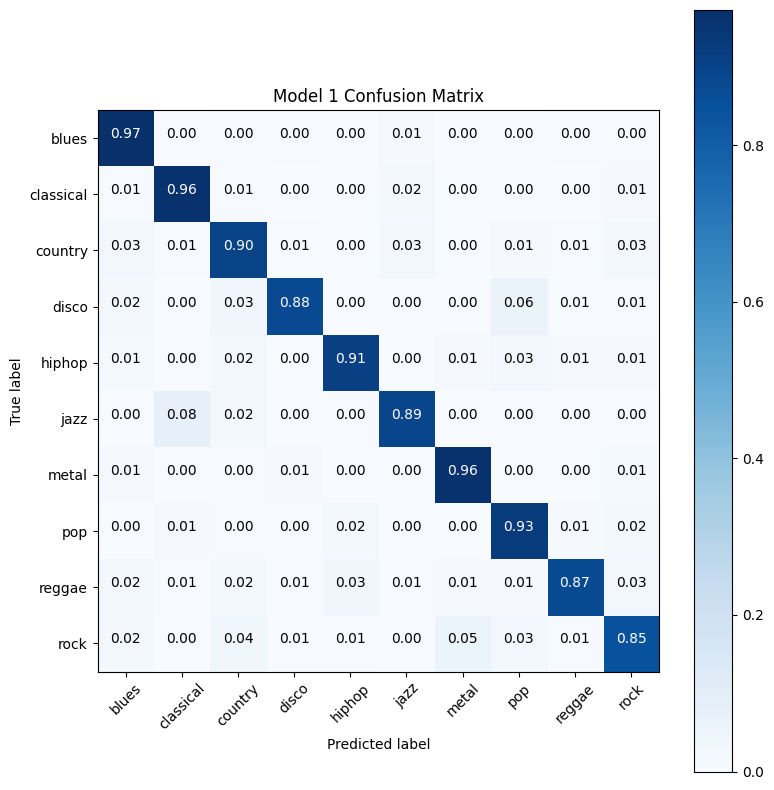

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='macro')  # 'macro' if you want to treat all classes equally
recall = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average='macro')

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plotting the heatmap
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Model 2 Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()
# Plotting the heatmap

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, keys, normalize=True)
plt.title('Model 1 Confusion Matrix')
plt.show()

Final validation accuracy 0.9036898016929626
Maximal validation accuracy achieved = 0.9224515557289124 at epoch 41


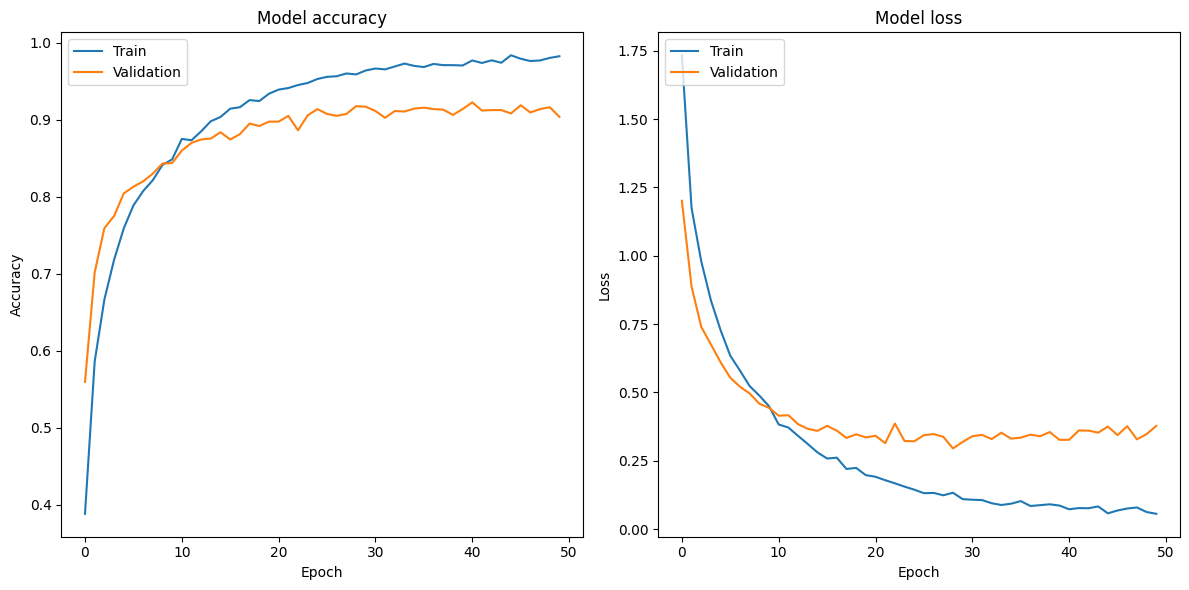

In [ ]:
print(f"Final validation accuracy", history.history['val_accuracy'][-1])
print(f"Maximal validation accuracy achieved =", np.max(history.history['val_accuracy']),
      "at epoch",(np.argmax(history.history['val_accuracy'])+1))
# Plot training & validation accuracy values

# Set up the figure size to be square for both subplots
plt.figure(figsize=(12, 6))  # Overall figure size

# Set up the first subplot for accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Set up the second subplot for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
# Adjust subplot parameters to give specified padding
plt.tight_layout()
# Show the complete figure with both subplots
plt.show()

In [ ]:
# Clean old model files
del model
K.clear_session()
gc.collect()

22011

## Method 3 (CNN on Converted Spectrograms)

### Preprocess spectrogram image data for CNN

In [ ]:
import matplotlib.image as mpimg

# Check image size
# Load the image from file
image_path = "//content/Data/images_original/hiphop/hiphop00000.png"
image = mpimg.imread(image_path)

# Get the size of the image
height, width, channels = image.shape

print(f"The image size is: {width}x{height} pixels.")
if channels == 3:
    print("The image has 3 channels (RGB).")
elif channels == 4:
    print("The image has 4 channels (RGBA).")
elif channels == 1:
    print("The image has 1 channel (grayscale).")

The image size is: 432x288 pixels.
The image has 4 channels (RGBA).


In [ ]:
from keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
# Define the path to the base directory where the folders for each genre are located
base_path = '/content/Data/images_original/'

# List of genres (classes)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

# Initialize an encoder for your labels
label_encoder = LabelEncoder()
label_encoder.fit(genres)

# Prepare lists to store the loaded images and labels
images = []
labels = []

# Target size for your images
target_size = (432, 288)

# Iterate over each genre
for genre in genres:
    # Directory for the genre
    genre_dir = os.path.join(base_path, genre)

    # Iterate over each image file in the genre directory
    for filename in os.listdir(genre_dir):
        # Full path to the image file
        # file_path = f'/content/output/{genre}/{filename}'
        file_path = os.path.join(genre_dir, filename)

        # print(file_path)

        # Load the image, resize it and convert it to a numpy array
        img = load_img(file_path, target_size=target_size, color_mode='rgb')
        img_array = img_to_array(img)

        # Normalize the image array to [0, 1]
        img_array /= 255.0

        # Add the image array to the list of images
        images.append(img_array)

        # Add the label to the list of labels
        labels.append(genre)

# Convert the list of images and labels to numpy arrays
X = np.array(images)
y = np.array(labels)

# Encode the labels to integers
y_encoded = label_encoder.transform(y)

# Convert integer encoded labels to one-hot encoded labels
y_categorical = to_categorical(y_encoded)

# Now, X and y_one_hot can be used for training a CNN

In [ ]:
# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)


num_genres = 10
input_shape = (X_train.shape[1 :])
print(X_train.shape)
print(input_shape)
print(y_categorical.shape)
print(y_train.shape)

(799, 432, 288, 3)
(432, 288, 3)
(999, 10)
(799, 10)


### CNN model (Self-designed CNN model, ResNet, VGG16 )

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, LSTM, GRU, Reshape
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam


#Model 3 Architecture

# model = models.Sequential([
#       Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
#       MaxPooling2D((2, 2)),
#       Conv2D(64, (3, 3), activation='relu'),
#       MaxPooling2D((2, 2)),
#       Conv2D(128, (3, 3), activation='relu'),
#       MaxPooling2D((2, 2)),
#       Conv2D(256, (3, 3), activation='relu'),
#       MaxPooling2D((2, 2)),
#       Flatten(),
#       Dense(256, activation='relu'),
#       Dropout(0.3),
#       Dense(128, activation='relu'),
#       Dropout(0.3),
#       Dense(num_genres, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # # Model summary
# model.summary()






# # Load pre-trained ResNet-50 model
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# # Freeze all layers in the base model
# for layer in base_model.layers:
#     layer.trainable = True

# # Add custom layers
# x = base_model.output
# x = GlobalAveragePooling2D()(x)  # Add a global spatial average pooling layer
# x = Dense(1024, activation='relu')(x)  # Add a fully-connected layer
# predictions = Dense(units = num_genres, activation='softmax')(x)  # Add a logistic layer for classes

# # This is the model we will train
# model = Model(inputs=base_model.input, outputs=predictions)

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Model summary
# model.summary()






#VGG16 model

# model = Sequential()

# model.add(Conv2D(input_shape=input_shape,filters=64,kernel_size=(3,3),padding='same', activation='relu'))

# model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same', activation='relu'))

# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))

# model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))

# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))

# model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))

# model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))

# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),name='vgg16'))

# model.add(Flatten(name='flatten'))

# model.add(Dense(256, activation='relu', name='fc1'))

# model.add(Dense(128, activation='relu', name='fc2'))

# model.add(Dense(10, activation='softmax', name='output'))

# # Create an optimizer instance with the desired learning rate
# optimizer = Adam(learning_rate=0.01)

# # Compile the model
# model.compile(optimizer= optimizer,
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# # Model summary
# model.summary()


# Uodate CNN model
model = Sequential()
# Conv Block 1
model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.25))

# Conv Block 4
model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.25))

# Conv Block 5
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu',	padding='same'))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.25))


# MLP
model.add(Flatten())
model.add(Dense(units = 10, activation='softmax'))

print('Summary..')
model.summary()

print('Compiling Model')
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

Summary..
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 430, 286, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 215, 143, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 215, 143, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 213, 141, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 107, 71, 32)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 107, 71, 3

In [ ]:
model= model
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
20/20 [==============================] - 14s 241ms/step - loss: 2.3212 - accuracy: 0.0986 - val_loss: 2.3023 - val_accuracy: 0.1063
Epoch 2/50
20/20 [==============================] - 2s 124ms/step - loss: 2.2330 - accuracy: 0.1440 - val_loss: 2.2569 - val_accuracy: 0.1562
Epoch 3/50
20/20 [==============================] - 3s 132ms/step - loss: 2.0887 - accuracy: 0.2254 - val_loss: 2.0656 - val_accuracy: 0.2188
Epoch 4/50
20/20 [==============================] - 3s 169ms/step - loss: 1.9979 - accuracy: 0.2379 - val_loss: 2.0381 - val_accuracy: 0.2562
Epoch 5/50
20/20 [==============================] - 3s 149ms/step - loss: 1.9320 - accuracy: 0.2942 - val_loss: 1.9931 - val_accuracy: 0.2875
Epoch 6/50
20/20 [==============================] - 3s 154ms/step - loss: 1.8705 - accuracy: 0.3192 - val_loss: 1.9338 - val_accuracy: 0.2812
Epoch 7/50
20/20 [==============================] - 3s 158ms/step - loss: 1.7894 - accuracy: 0.3505 - val_loss: 1.7556 - val_accuracy: 0.3562
Epoch

Final validation accuracy 0.6000000238418579
Maximal validation accuracy achieved = 0.6499999761581421 at epoch 31


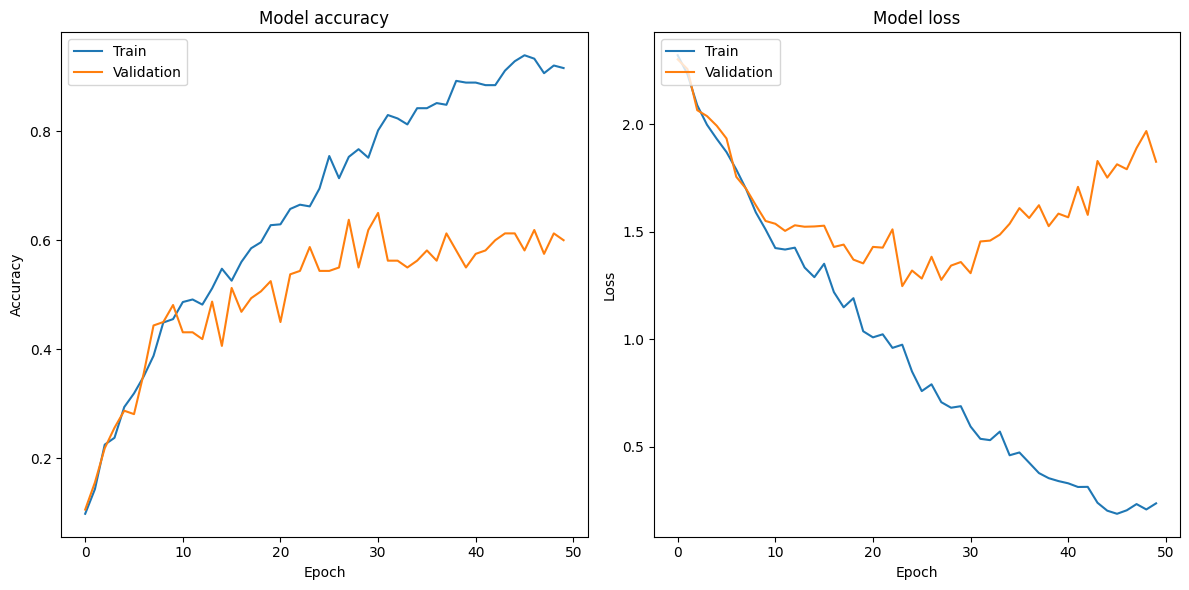

Confusion Matrix Calculating..
7/7 [==============================] - 1s 85ms/step
Normalized confusion matrix


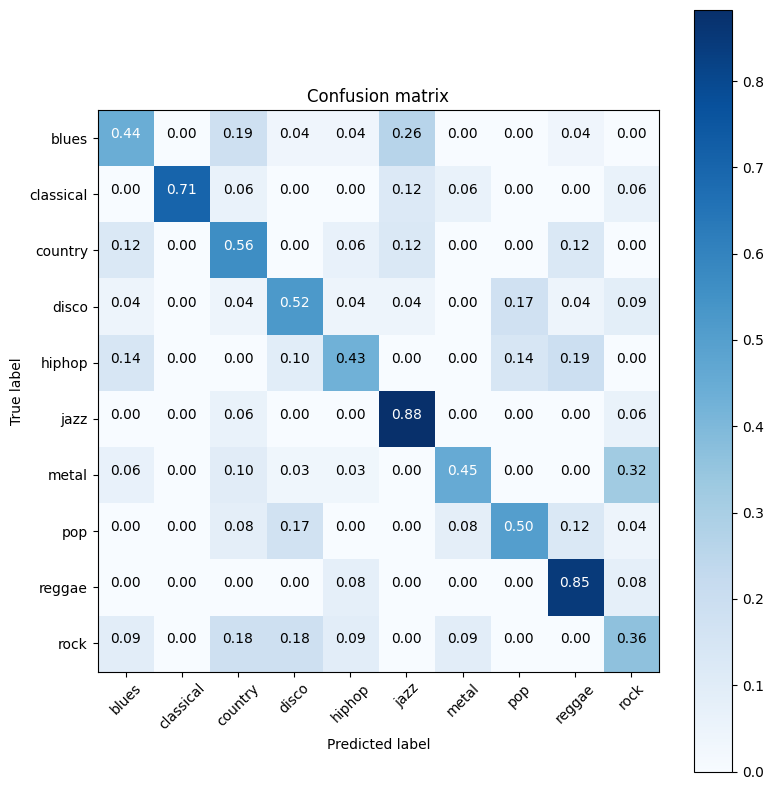

In [ ]:

from collections import OrderedDict

print(f"Final validation accuracy", history.history['val_accuracy'][-1])
print(f"Maximal validation accuracy achieved =", np.max(history.history['val_accuracy']),
      "at epoch",(np.argmax(history.history['val_accuracy'])+1))
# Plot training & validation accuracy values

# Set up the figure size to be square for both subplots
plt.figure(figsize=(12, 6))  # Overall figure size

# Set up the first subplot for accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Set up the second subplot for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
# Adjust subplot parameters to give specified padding
plt.tight_layout()
# Show the complete figure with both subplots
plt.show()

print('Confusion Matrix Calculating..')
preds = np.argmax(model.predict(X_test), axis = 1)
y_orig = np.argmax(y_test, axis = 1)
cm = confusion_matrix(preds, y_orig)
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, keys, normalize=True)
plt.show()

In [ ]:
# Clean old model files
del model
K.clear_session()
gc.collect()

24739

## Model 4 (CNN on MFCC features only)

### Extract MFCC data for CNN

In [ ]:
# Browse each file, slice it and generate the 40 band mfcc for each slice.
def preprocess(dataset_path, num_mfcc=40, n_fft=2048, hop_length=512, num_segment=10):
    data = {"labels": [], "mfcc": []}
    sample_rate = 22050
    samples_per_segment = int(sample_rate * 30 / num_segment)

    for label_idx, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath == dataset_path:
            continue

        for f in sorted(filenames):
            if not f.endswith('.wav'):
                continue
            file_path = str(str(dirpath).split('\\')[-1]) + "/" + str(f)
            print("Track Name ", file_path)

            try:
                y, sr = librosa.load(file_path, sr=sample_rate)
            except:
                continue

            for n in range(num_segment):
                mfcc = librosa.feature.mfcc(y = y[samples_per_segment*n: samples_per_segment*(n+1)],
                                sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                hop_length=hop_length)
                mfcc = mfcc.T
                if len(mfcc) == math.ceil(samples_per_segment / hop_length):
                    data["mfcc"].append(mfcc.tolist())
                    data["labels"].append(label_idx-1)
    return data

dataset_path = '/content/Data/genres_original'
mfcc_data = preprocess(dataset_path)

Track Name  /content/Data/genres_original/reggae/reggae.00000.wav
Track Name  /content/Data/genres_original/reggae/reggae.00001.wav
Track Name  /content/Data/genres_original/reggae/reggae.00002.wav
Track Name  /content/Data/genres_original/reggae/reggae.00003.wav
Track Name  /content/Data/genres_original/reggae/reggae.00004.wav
Track Name  /content/Data/genres_original/reggae/reggae.00005.wav
Track Name  /content/Data/genres_original/reggae/reggae.00006.wav
Track Name  /content/Data/genres_original/reggae/reggae.00007.wav
Track Name  /content/Data/genres_original/reggae/reggae.00008.wav
Track Name  /content/Data/genres_original/reggae/reggae.00009.wav
Track Name  /content/Data/genres_original/reggae/reggae.00010.wav
Track Name  /content/Data/genres_original/reggae/reggae.00011.wav
Track Name  /content/Data/genres_original/reggae/reggae.00012.wav
Track Name  /content/Data/genres_original/reggae/reggae.00013.wav
Track Name  /content/Data/genres_original/reggae/reggae.00014.wav
Track Name

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the data
x = np.array(mfcc_data["mfcc"])
y = np.array(mfcc_data["labels"])

# Reshape the data
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)

# Convert labels to categorical
y_categorical = tf.keras.utils.to_categorical(y, num_classes=10)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_categorical, test_size=0.2)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

# Fix the labels with value 10 to 9
# y_train[y_train==10] = 9
# y_val[y_val==10] = 9
# y_test[y_test==10] = 9

# Define the input shape
input_shape = x_train.shape[1:]

In [ ]:

num_genres = 10
input_shape = (x_train.shape[1 :])
print(x_train.shape)
print(input_shape)
print(y_categorical.shape)
print(y_train.shape)

(6390, 130, 40, 1)
(130, 40, 1)
(9986, 10)
(6390, 10)


### CNN model

In [ ]:
# Model 4 Architecture

cnn_model = models.Sequential([
      Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
      MaxPooling2D((2, 2)),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D((2, 2)),
      Conv2D(128, (3, 3), activation='relu'),
      MaxPooling2D((2, 2)),
      Flatten(),
      Dense(128, activation='relu'),
      Dropout(0.2),
      Dense(num_genres, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 38, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 19, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 17, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 6, 128)        73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 3, 128)        0

In [ ]:
model= cnn_model
history=model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
160/160 [==============================] - 5s 14ms/step - loss: 2.1543 - accuracy: 0.3194 - val_loss: 1.4580 - val_accuracy: 0.4828
Epoch 2/50
160/160 [==============================] - 1s 8ms/step - loss: 1.3960 - accuracy: 0.4904 - val_loss: 1.2319 - val_accuracy: 0.5610
Epoch 3/50
160/160 [==============================] - 1s 8ms/step - loss: 1.1381 - accuracy: 0.5939 - val_loss: 1.3299 - val_accuracy: 0.5227
Epoch 4/50
160/160 [==============================] - 1s 8ms/step - loss: 1.0015 - accuracy: 0.6414 - val_loss: 1.0896 - val_accuracy: 0.6166
Epoch 5/50
160/160 [==============================] - 1s 8ms/step - loss: 0.8466 - accuracy: 0.7046 - val_loss: 1.0064 - val_accuracy: 0.6463
Epoch 6/50
160/160 [==============================] - 1s 8ms/step - loss: 0.7089 - accuracy: 0.7570 - val_loss: 1.0287 - val_accuracy: 0.6416
Epoch 7/50
160/160 [==============================] - 1s 8ms/step - loss: 0.5790 - accuracy: 0.7921 - val_loss: 0.9293 - val_accuracy: 0.6956
Epoch

Final validation accuracy 0.6893583536148071
Maximal validation accuracy achieved = 0.7331768274307251 at epoch 17


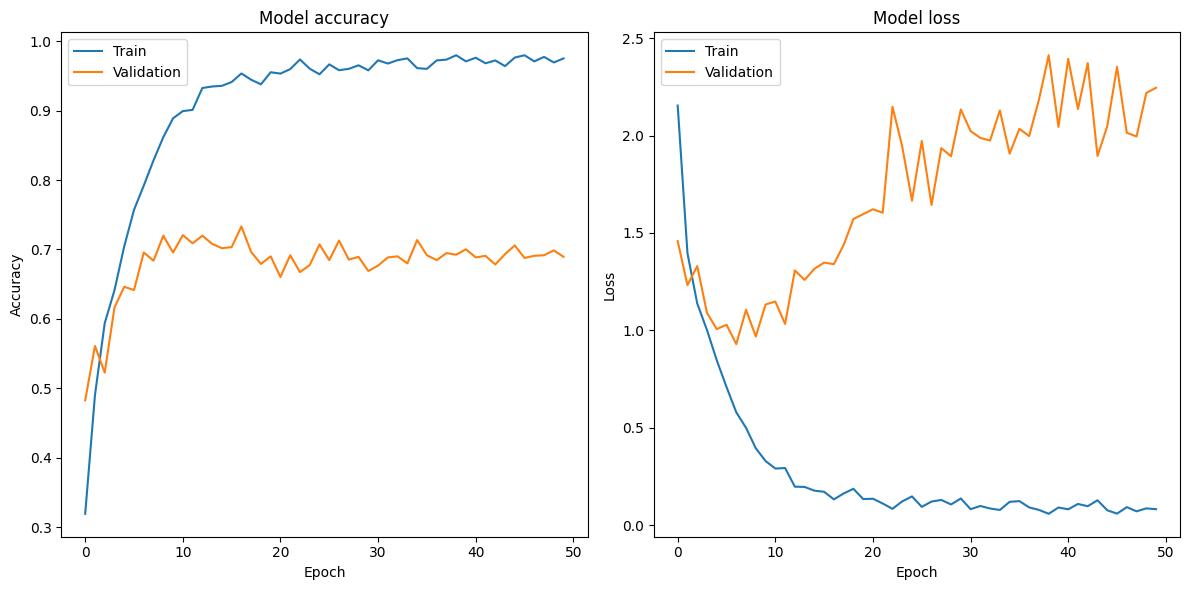

Confusion Matrix Calculating..
63/63 [==============================] - 0s 4ms/step
Normalized confusion matrix


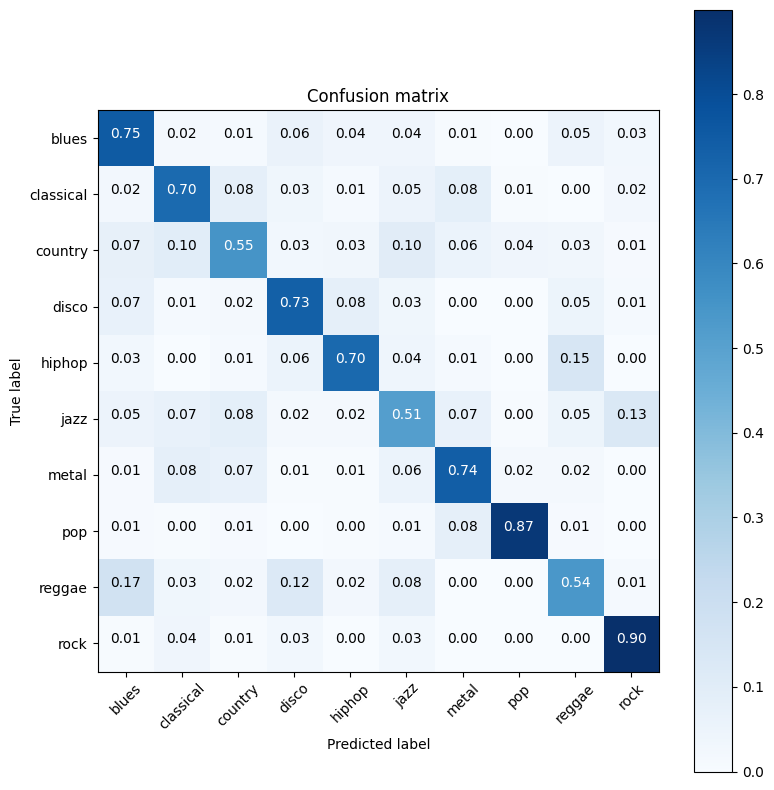

In [ ]:
print(f"Final validation accuracy", history.history['val_accuracy'][-1])
print(f"Maximal validation accuracy achieved =", np.max(history.history['val_accuracy']),
      "at epoch",(np.argmax(history.history['val_accuracy'])+1))
# Plot training & validation accuracy values

# Set up the figure size to be square for both subplots
plt.figure(figsize=(12, 6))  # Overall figure size

# Set up the first subplot for accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Set up the second subplot for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
# Adjust subplot parameters to give specified padding
plt.tight_layout()
# Show the complete figure with both subplots
plt.show()

print('Confusion Matrix Calculating..')
preds = np.argmax(model.predict(x_test), axis = 1)
y_orig = np.argmax(y_test, axis = 1)
cm = confusion_matrix(preds, y_orig)
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, keys, normalize=True)
plt.show()

In [ ]:
# Clean old model files
del model
K.clear_session()
gc.collect()

25589

### Upgrade CNN version

In [ ]:
# Model 5 Architecture

cnn_model_1 = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', padding='valid', input_shape = input_shape),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Conv2D(64, (3,3), activation = 'relu', padding='valid', input_shape = input_shape),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Conv2D(128, (3,3), activation='relu', padding='valid'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), activation='relu', padding='valid'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.3),

    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn_model_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
cnn_model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 38, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 19, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 17, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 9, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 7, 128)        73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 4, 128)        0

In [ ]:
model= cnn_model_1
history=model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
160/160 [==============================] - 6s 15ms/step - loss: 0.2692 - accuracy: 0.3523 - val_loss: 0.2201 - val_accuracy: 0.4742
Epoch 2/50
160/160 [==============================] - 2s 10ms/step - loss: 0.2018 - accuracy: 0.5317 - val_loss: 0.1998 - val_accuracy: 0.5329
Epoch 3/50
160/160 [==============================] - 2s 11ms/step - loss: 0.1850 - accuracy: 0.5869 - val_loss: 0.1737 - val_accuracy: 0.6072
Epoch 4/50
160/160 [==============================] - 2s 10ms/step - loss: 0.1662 - accuracy: 0.6328 - val_loss: 0.1563 - val_accuracy: 0.6721
Epoch 5/50
160/160 [==============================] - 2s 10ms/step - loss: 0.1508 - accuracy: 0.6735 - val_loss: 0.1412 - val_accuracy: 0.7136
Epoch 6/50
160/160 [==============================] - 2s 12ms/step - loss: 0.1376 - accuracy: 0.7105 - val_loss: 0.1417 - val_accuracy: 0.7011
Epoch 7/50
160/160 [==============================] - 3s 17ms/step - loss: 0.1257 - accuracy: 0.7435 - val_loss: 0.1347 - val_accuracy: 0.7230

Final validation accuracy 0.8568075299263
Maximal validation accuracy achieved = 0.8568075299263 at epoch 50


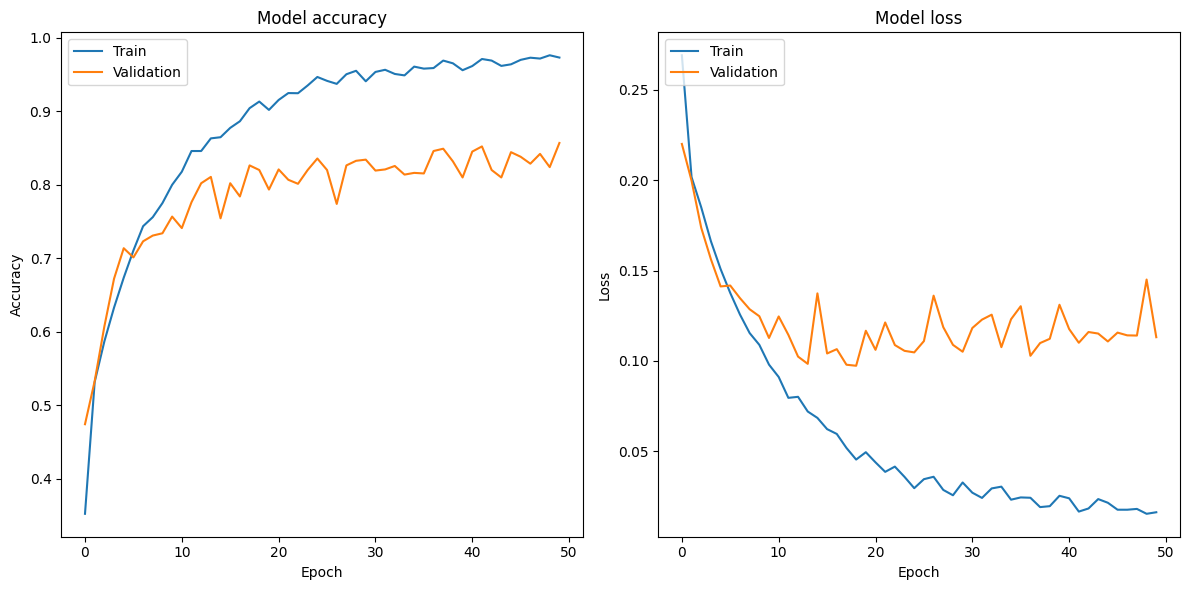

Confusion Matrix Calculating..
63/63 [==============================] - 0s 5ms/step
Normalized confusion matrix


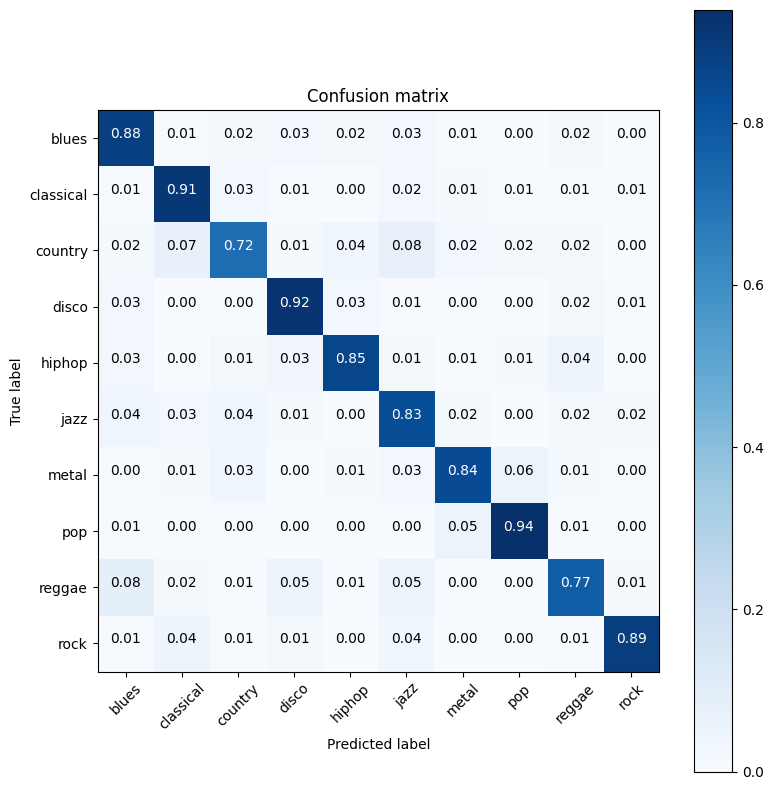

In [ ]:
print(f"Final validation accuracy", history.history['val_accuracy'][-1])
print(f"Maximal validation accuracy achieved =", np.max(history.history['val_accuracy']),
      "at epoch",(np.argmax(history.history['val_accuracy'])+1))
# Plot training & validation accuracy values

# Set up the figure size to be square for both subplots
plt.figure(figsize=(12, 6))  # Overall figure size

# Set up the first subplot for accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Set up the second subplot for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
# Adjust subplot parameters to give specified padding
plt.tight_layout()
# Show the complete figure with both subplots
plt.show()

print('Confusion Matrix Calculating..')
preds = np.argmax(model.predict(x_test), axis = 1)
y_orig = np.argmax(y_test, axis = 1)
cm = confusion_matrix(preds, y_orig)
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, keys, normalize=True)
plt.show()

In [ ]:
# Clean old model files
del model
K.clear_session()
gc.collect()

21624